# Solving real world data science tasks with Python Pandas!
## Keith Galli
- YouTube: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=WL&index=79&t=705s
- Github: https://github.com/KeithGalli/Pandas-Data-Science-Tasks

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv(r'SalesAnalysis\Sales_Data\Sales_April_2019.csv')

files = [file for file in os.listdir(r'SalesAnalysis\Sales_Data')]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3722,180127,LG Washing Machine,1,600.0,04/23/19 09:34,"927 Jackson St, Los Angeles, CA 90001"
180496,253270,iPhone,1,700,09/06/19 13:39,"439 9th St, Atlanta, GA 30301"
13628,189549,USB-C Charging Cable,2,11.95,04/04/19 22:54,"997 Forest St, Austin, TX 73301"
52637,316911,27in 4K Gaming Monitor,1,389.99,12/17/19 21:56,"890 11th St, Atlanta, GA 30301"
184685,257290,AAA Batteries (4-pack),1,2.99,09/11/19 15:05,"999 Church St, Atlanta, GA 30301"


## Data Exploration and Preparation

In [5]:
print(all_data.shape)
print(all_data.isnull().sum())
all_data.info()

(186850, 6)
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
all_data.drop_duplicates(inplace=True)
print(all_data.shape)
all_data.isnull().sum()

(185688, 6)


Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [7]:
all_data[all_data['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data.dropna(inplace=True)

In [9]:
#pd.to_numeric(all_data['Quantity Ordered'])

ValueError: Unable to parse string "Quantity Ordered" at position 516

In [10]:
all_data.iloc[516]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 519, dtype: object

In [11]:
index_names = all_data[ all_data['Order ID'].str.contains('Order')].index

all_data.drop(index_names, inplace=True)

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185686 non-null object
Product             185686 non-null object
Quantity Ordered    185686 non-null int64
Price Each          185686 non-null float64
Order Date          185686 non-null datetime64[ns]
Purchase Address    185686 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [13]:
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
76047,149336,USB-C Charging Cable,1,11.95,2019-01-29 10:29:00,"939 Forest St, Austin, TX 73301"
84620,229935,Wired Headphones,1,11.99,2019-07-05 08:50:00,"642 7th St, New York City, NY 10001"
14348,190239,LG Washing Machine,1,600.00,2019-04-12 21:17:00,"59 Hill St, San Francisco, CA 94016"
40341,305149,Apple Airpods Headphones,1,150.00,2019-12-10 14:10:00,"527 Hill St, San Francisco, CA 94016"
11914,187925,27in FHD Monitor,1,149.99,2019-04-17 13:12:00,"688 Lincoln St, Los Angeles, CA 90001"


## Q1: Best month of sales all Data? How much was earned that month?

In [14]:
# create a column for the month
all_data['month'] = pd.DatetimeIndex(all_data['Order Date']).month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [15]:
# create a column total
all_data['total'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [16]:
# answer the question
results = all_data.groupby('month')[['total', 'Quantity Ordered']].sum().astype('int').sort_values('total', ascending=False)
results

,total,Quantity Ordered
month,,
12,4608295,28074
10,3734777,22669
4,3389217,20536
11,3197875,19769
5,3150616,18653
3,2804973,16979
7,2646461,16054
6,2576280,15234
8,2241083,13429


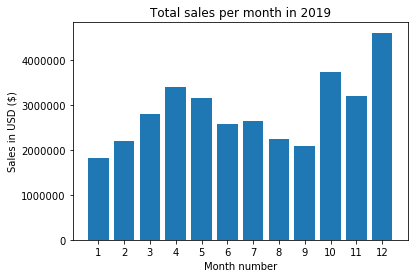

In [41]:
import matplotlib.pyplot as plt

plt.bar(results.index, results['total'])
plt.xticks(results.index)
plt.title('Total sales per month in 2019')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Explore a bit more

In [18]:
all_data.describe().astype(int)

,Quantity Ordered,Price Each,month,total
count,185686,185686,185686,185686
mean,1,184,7,185
std,0,332,3,333
min,1,2,1,2
25%,1,11,4,11
50%,1,14,7,14
75%,1,150,10,150
max,9,1700,12,3400


In [19]:
all_data[all_data['total'] > 2000]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.0
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.0
92026,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0
127265,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.0


## Q2.: What US City had the highest number of sales?

In [20]:
# add city column
all_data['city'] = all_data['Purchase Address'].str.split(",").str[1].str.strip()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
# try to add state column
all_data['state'] = all_data['Purchase Address'].str.split(",").str[2].str.strip().str.split(" ").str[0].str.strip()
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,state
101499,219315,AA Batteries (4-pack),2,3.84,2019-06-13 18:42:00,"856 Jefferson St, Boston, MA 02215",6,7.68,Boston,MA
117492,173684,AA Batteries (4-pack),2,3.84,2019-03-03 19:01:00,"769 North St, Dallas, TX 75001",3,7.68,Dallas,TX
85371,230648,AA Batteries (4-pack),1,3.84,2019-07-11 18:24:00,"586 Sunset St, Seattle, WA 98101",7,3.84,Seattle,WA
81724,227171,Flatscreen TV,1,300.00,2019-07-25 03:49:00,"660 Meadow St, Los Angeles, CA 90001",7,300.00,Los Angeles,CA
70045,143604,USB-C Charging Cable,1,11.95,2019-01-20 17:09:00,"485 Lincoln St, Seattle, WA 98101",1,11.95,Seattle,WA


In [23]:
per_city = all_data[['total', 'Quantity Ordered', 'city']].groupby('city').sum().sort_values(by='total', ascending=False)

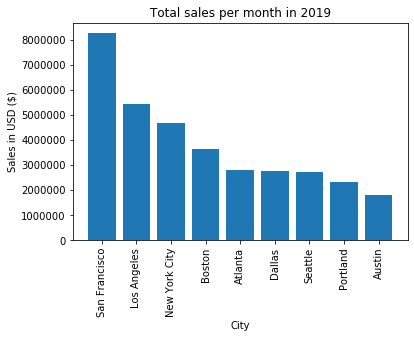

In [30]:
plt.bar(per_city.index, per_city['total'])

plt.xticks(per_city.index, rotation=90)
plt.title('Total sales per month in 2019')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

## Q.3: What time should we display ad to maximize likelihood of customer's buying?

In [48]:
all_data['hour'] =all_data['Order Date'].dt.hour

In [36]:
per_hour = all_data[['Quantity Ordered', 'total', 'hour']].groupby('hour').sum().sort_values(by=['Quantity Ordered', 'total'], ascending=False)

In [38]:
per_hour

,Quantity Ordered,total
hour,,
19,14451,2411971.14
12,14188,2314359.85
11,13986,2296619.84
18,13785,2218374.01
20,13758,2280784.36
13,13671,2152369.98
14,12343,2082513.70
10,12292,1942988.08
21,12228,2040790.48


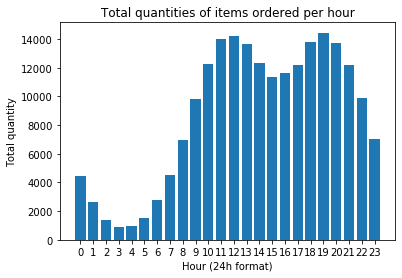

In [45]:
plt.bar(per_hour.index, per_hour['Quantity Ordered'])

plt.xticks(per_hour.index)
plt.title('Total quantities of items ordered per hour')
plt.ylabel('Total quantity')
plt.xlabel('Hour (24h format)')
plt.show()

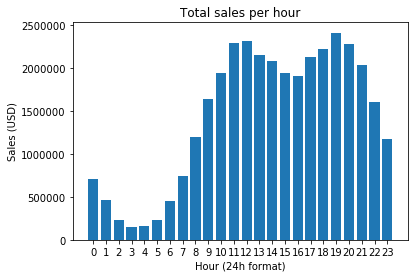

In [40]:
plt.bar(per_hour.index, per_hour['total'])

plt.xticks(per_hour.index)
plt.title('Total sales per hour')
plt.ylabel('Sales (USD)')
plt.xlabel('Hour (24h format)')
plt.show()

In [51]:
count_per_hour = all_data[['Order ID', 'hour']].groupby('hour').count()
count_per_hour

,Order ID
hour,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


<BarContainer object of 24 artists>

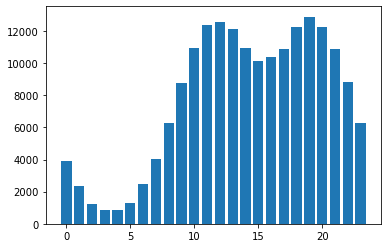

In [53]:
plt.bar(count_per_hour.index, count_per_hour['Order ID'])

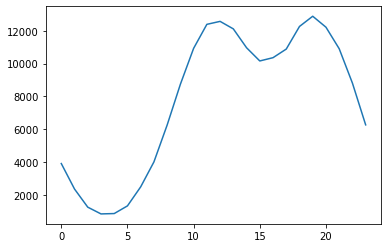

In [54]:
# lui: line
plt.plot(count_per_hour.index, count_per_hour['Order ID'])

on pourrait aussi incorporer les minutes en mettant heure+(min/60) pour faire une variable continue sur l'axe des x, mais passons

## Q.4 What products are most often sold together?
- Grouper par Order ID
- Transposer
- créer les colonnes binaires pour produits

In [58]:
per_order = all_data.groupby(['Order ID']).count()
per_order.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,state,hour
Order ID,,,,,,,,,,
141234,1,1,1,1,1,1,1,1,1,1
141235,1,1,1,1,1,1,1,1,1,1
141236,1,1,1,1,1,1,1,1,1,1
141237,1,1,1,1,1,1,1,1,1,1
141238,1,1,1,1,1,1,1,1,1,1


In [60]:
multi = per_order[per_order['Product'] > 1].index
multi

Index(['141275', '141290', '141365', '141384', '141450', '141457', '141478',
       '141550', '141587', '141645',
       ...
       '319337', '319359', '319447', '319514', '319533', '319536', '319556',
       '319584', '319596', '319631'],
      dtype='object', name='Order ID', length=6879)

In [96]:
prod = all_data[all_data['Order ID'].isin(multi)][['Order ID', 'Product']]

In [97]:
prod = prod.drop('Product', 1).join(pd.get_dummies(prod['Product']))

In [98]:
prod

,Order ID,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
3,176560,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,176560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18,176574,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19,176574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32,176586,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
186803,259314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
186804,259314,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
186841,259350,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [91]:
prod = prod.groupby('Order ID').sum()
prod.head()

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


- matrice, mais je sais pas quels sont les produits les plus achetés ensemble.
- donc lui:

In [95]:
prod2 = all_data[all_data['Order ID'].isin(multi)][['Order ID', 'Product']]
prod2.head()

,Order ID,Product
3,176560,Google Phone
4,176560,Wired Headphones
18,176574,Google Phone
19,176574,USB-C Charging Cable
32,176586,AAA Batteries (4-pack)


In [100]:
prod2['Grouped'] = prod2.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
print(prod2.shape)
prod2.head()

(14128, 3)


,Order ID,Product,Grouped
3,176560,Google Phone,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,"Google Phone, Wired Headphones"
18,176574,Google Phone,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,"Google Phone, USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),"AAA Batteries (4-pack), Google Phone"


In [102]:
prod2.drop('Product', axis=1, inplace=True)
print(prod2.shape)
prod2.head()

(14128, 2)


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
4,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
19,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"


In [103]:
prod2.drop_duplicates(inplace=True)
print(prod2.shape)
prod2.head()

(6879, 2)


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"


In [109]:
per_prod_gr = prod2.groupby('Grouped').count().sort_values(by='Order ID', ascending=False)
per_prod_gr.head(10)

,Order ID
Grouped,
"iPhone, Lightning Charging Cable",886
"Google Phone, USB-C Charging Cable",857
"iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones",303
"iPhone, Apple Airpods Headphones",286
"Google Phone, Bose SoundSport Headphones",161
"Vareebadd Phone, Wired Headphones",104
"Google Phone, USB-C Charging Cable, Wired Headphones",79


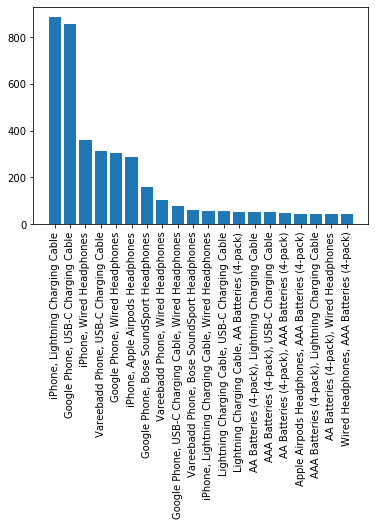

In [111]:
plt.bar(per_prod_gr.head(20).index, per_prod_gr.head(20)['Order ID'])

plt.xticks(per_prod_gr.head(20).index, rotation=90)

plt.show()

## overlap products that sold the most with their prices

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,state,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [142]:
per_prod = all_data[['Product' , 'Order ID']].groupby('Product').count()
price_prod = all_data[['Price Each', 'Product']].groupby('Product').mean()
per_prod

,Order ID
Product,
20in Monitor,4098
27in 4K Gaming Monitor,6225
27in FHD Monitor,7498
34in Ultrawide Monitor,6174
AA Batteries (4-pack),20558
AAA Batteries (4-pack),20612
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
Flatscreen TV,4794


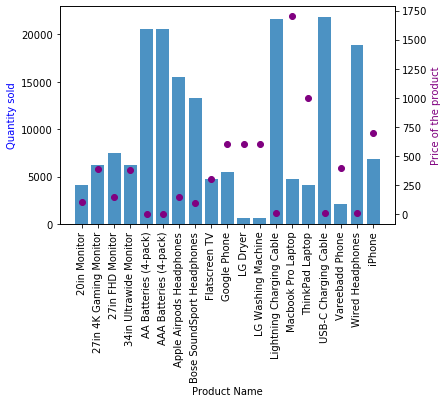

In [153]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(per_prod.index, per_prod['Order ID'], alpha=0.8)
ax2.scatter(price_prod.index, price_prod['Price Each'], color='purple')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity sold', color='blue')
ax2.set_ylabel('Price of the product', color='purple')
ax1.set_xticklabels(per_prod.index, rotation=90)

plt.show()

In [154]:
per_prod['Price'] = price_prod['Price Each']
per_prod.head()

,Order ID,Price
Product,,
20in Monitor,4098,109.99
27in 4K Gaming Monitor,6225,389.99
27in FHD Monitor,7498,149.99
34in Ultrawide Monitor,6174,379.99
AA Batteries (4-pack),20558,3.84


In [158]:
per_prod.rename(columns= {'Order ID': 'Qty_sold'}, inplace=True)

In [160]:
per_prod.corr()

,Qty_sold,Price
Qty_sold,1.000000,-0.616519
Price,-0.616519,1.000000
